In [7]:
# this notebook summarizes the results across the 1-dimensional canonical problem cases
# Cases:
#   1. Determinisitic Multimodal Localized Extrema
#   2. Stochastic, Discontinuity Multimodal Localized Extrema
#   3. Deterministic Multimodal "Five-Uneven-Peak-Trap" [1]
#   4. Deterministic Multimodal "Uneven Decreasing Maxima" [1]
#
# Author: Alex Braafladt
# Date created: 3/11/23
#
# References:
# [1] X. Li, A. Engelbrecht, and M. G. Epitropakis, “Benchmark Functions for CEC’2013
#     Special Session and Competition on Niching Methods for Multimodal Function Optimization,” 2016.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
import pandas as pd

In [9]:
# setup file i/o
import os as os
import datetime as dt
# get current working directory
wrkdir = os.getcwd()
print('Current working directory: '+wrkdir)
# set up a data save directory for all future runs
newoutputdir = wrkdir+'\output'
if not os.path.exists(newoutputdir):
    os.makedirs(newoutputdir)
# set up a new directory to store files for the current run - updates at each new full run of notebook
curDatetime = dt.datetime.now()
datasavedir = newoutputdir + r'\\' + 'exp2.1_2.2_summary_plots' + str(curDatetime.strftime('%Y%m%d%H%M%S'))
if not os.path.exists(datasavedir):
    os.makedirs(datasavedir)
print('Data save directory: '+datasavedir)

Current working directory: C:\Users\alexb\Documents\GitHub\extrema_search\src\notebooks\iter4_exp2
Data save directory: C:\Users\alexb\Documents\GitHub\extrema_search\src\notebooks\iter4_exp2\output\\exp2.1_2.2_summary_plots20230323101755


In [10]:
# plot comparison for deterministic multimodal localized extrema
# metrics: peak ratio, success ratio, average function evaluations
# collect data
case1_data = {'peakratio':[0.77, 0.67, 1.00, 0.32, 0.92, 0.93],
              'successratio':[0.40, 0.33, 1.00, 0.00, 0.73, 0.73],
              'avefe':[117.93, 110.33, 53.13, 130.00, 97.00, 81.00],
              'method':['MCS', 'NEI', 'TEAD', 'TuRBO', 'QMC','PIONEER']}
case1_df = pd.DataFrame(case1_data)

In [11]:
torch.save(case1_df, 'test.pt')

In [12]:
tst = torch.load('test.pt')

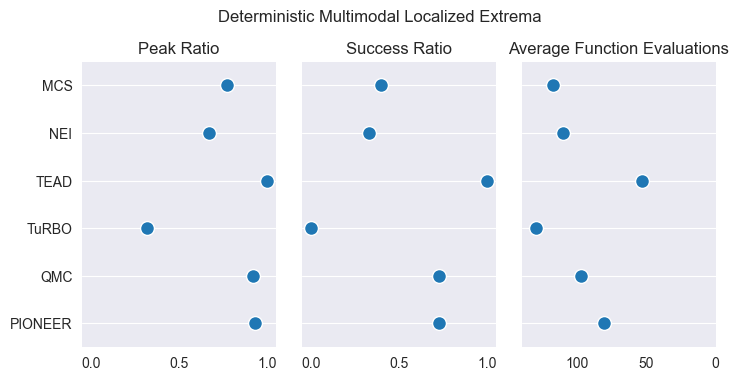

In [13]:
g = sns.PairGrid(case1_df,
                 x_vars=case1_df.columns[:3], y_vars=["method"],
                 height=4, aspect=0.6)
g.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")
# Use the same x axis limits on all columns and add better labels

titles = ['Peak Ratio', 'Success Ratio', 'Average Function Evaluations']
g.set(xlabel='', ylabel="")
for ax, title in zip(g.axes.flat, titles):
    # Set a different title for each axes
    ax.set(title=title)
    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)
sns.despine(left=True, bottom=True)
g.axes.flat[0].set_xlim([-0.05, 1.05])
g.axes.flat[1].set_xlim([-0.05, 1.05])
g.axes.flat[2].set_xlim([0, 140])
g.axes.flat[2].invert_xaxis()
g.figure.suptitle('Deterministic Multimodal Localized Extrema')
g.figure.subplots_adjust(top=0.85)
plt.savefig(datasavedir + '/'+'deterministic_mme_localized'+'.png', bbox_inches = 'tight')

In [14]:
# plot comparison for noisy, discontinuous multimodal localized extrema
# metrics: peak ratio, success ratio, average function evaluations
# collect data
case2_data = {'peakratio':[0.50, 0.37, 0.75, 0.25, 0.67, 0.92],
              'successratio':[0.00, 0.00, 0.27, 0.00, 0.20, 0.67],
              'avefe':[130.00, 130.00, 117.67, 130.00, 122.07, 108.27],
              'method':['MCS', 'NEI', 'TEAD', 'TuRBO', 'QMC','PIONEER']}
case2_df = pd.DataFrame(case2_data)

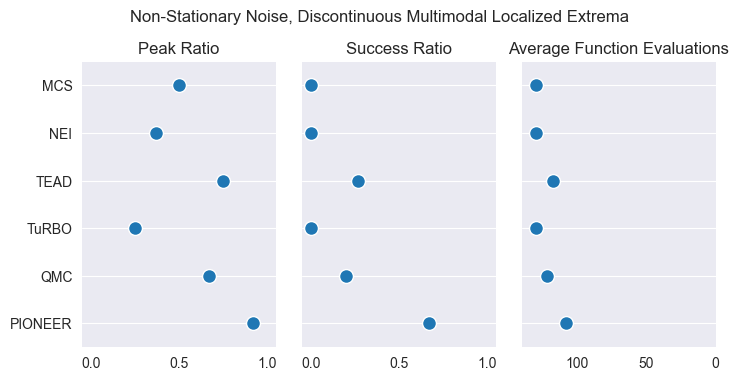

In [15]:
g2 = sns.PairGrid(case2_df,
                 x_vars=case2_df.columns[:3], y_vars=["method"],
                 height=4, aspect=0.6)
g2.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")
# Use the same x axis limits on all columns and add better labels

titles = ['Peak Ratio', 'Success Ratio', 'Average Function Evaluations']
g2.set(xlabel='', ylabel="")
for ax, title in zip(g2.axes.flat, titles):
    # Set a different title for each axes
    ax.set(title=title)
    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)
sns.despine(left=True, bottom=True)
g2.axes.flat[0].set_xlim([-0.05, 1.05])
g2.axes.flat[1].set_xlim([-0.05, 1.05])
g2.axes.flat[2].set_xlim([0, 140])
g2.axes.flat[2].invert_xaxis()
g2.figure.suptitle('Non-Stationary Noise, Discontinuous Multimodal Localized Extrema')
g2.figure.subplots_adjust(top=0.85)
plt.savefig(datasavedir + '/'+'noisyjump_mme_localized'+'.png', bbox_inches = 'tight')

In [16]:
# plot comparison for ea lit1 problem - five-uneven-peak-trap
# metrics: peak ratio, success ratio, average function evaluations
# collect data
case3_data = {'peakratio':[0.60, 0.73, 0.89, 0.39, 0.79, 0.93],
              'successratio':[0.00, 0.07, 0.53, 0.00, 0.33, 0.73],
              'avefe':[130.00, 125.93, 110.80, 130.00, 121.60, 116.13],
              'method':['MCS', 'NEI', 'TEAD', 'TuRBO', 'QMC','PIONEER']}
case3_df = pd.DataFrame(case3_data)

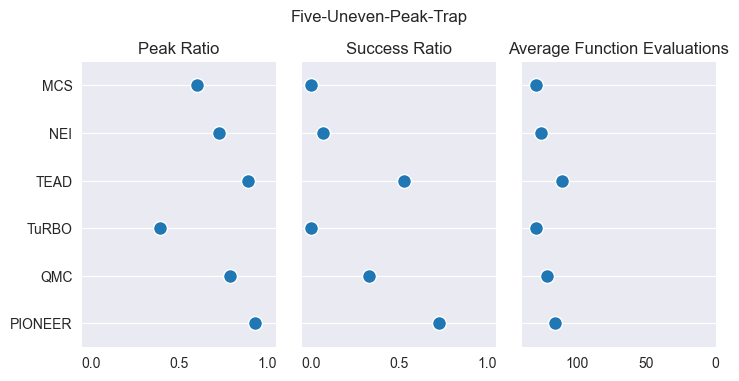

In [17]:
g3 = sns.PairGrid(case3_df,
                 x_vars=case3_df.columns[:3], y_vars=["method"],
                 height=4, aspect=0.6)
g3.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")
# Use the same x axis limits on all columns and add better labels

titles = ['Peak Ratio', 'Success Ratio', 'Average Function Evaluations']
g3.set(xlabel='', ylabel="")
for ax, title in zip(g3.axes.flat, titles):
    # Set a different title for each axes
    ax.set(title=title)
    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)
sns.despine(left=True, bottom=True)
g3.axes.flat[0].set_xlim([-0.05, 1.05])
g3.axes.flat[1].set_xlim([-0.05, 1.05])
g3.axes.flat[2].set_xlim([0, 140])
g3.axes.flat[2].invert_xaxis()
g3.figure.suptitle('Five-Uneven-Peak-Trap')
g3.figure.subplots_adjust(top=0.85)
plt.savefig(datasavedir + '/'+'lit1_fupt_mme'+'.png', bbox_inches = 'tight')

In [18]:
# plot comparison for ea lit2 problem - uneven decreasing maxima
# metrics: peak ratio, success ratio, average function evaluations
# collect data
case4_data = {'peakratio':[0.69, 0.88, 0.96, 0.39, 0.96, 0.93],
              'successratio':[0.07, 0.47, 0.80, 0.00, 0.80, 0.73],
              'avefe':[127.53, 114.33, 95.00, 130.00, 102.80, 109.00],
              'method':['MCS', 'NEI', 'TEAD', 'TuRBO', 'QMC','PIONEER']}
case4_df = pd.DataFrame(case4_data)

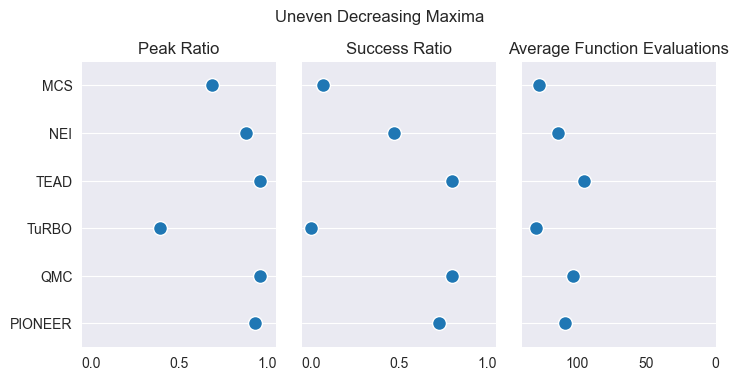

In [19]:
g4 = sns.PairGrid(case4_df,
                 x_vars=case4_df.columns[:3], y_vars=["method"],
                 height=4, aspect=0.6)
g4.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")
# Use the same x axis limits on all columns and add better labels

titles = ['Peak Ratio', 'Success Ratio', 'Average Function Evaluations']
g4.set(xlabel='', ylabel="")
for ax, title in zip(g4.axes.flat, titles):
    # Set a different title for each axes
    ax.set(title=title)
    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)
sns.despine(left=True, bottom=True)
g4.axes.flat[0].set_xlim([-0.05, 1.05])
g4.axes.flat[1].set_xlim([-0.05, 1.05])
g4.axes.flat[2].set_xlim([0, 140])
g4.axes.flat[2].invert_xaxis()
g4.figure.suptitle('Uneven Decreasing Maxima')
g4.figure.subplots_adjust(top=0.85)
plt.savefig(datasavedir + '/'+'lit2_udm_mme'+'.png', bbox_inches = 'tight')

In [20]:
# plot comparison for 2d 3 gaussian peak problem
# metrics: peak ratio, success ratio, average function evaluations
# collect data
case5_data = {'peakratio':[0.04, 0.00, 0.33, 0.04, 0.04, 0.12],
              'successratio':[0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
              'avefe':[400.00, 400.00, 400.00, 400.00, 400.00, 400.00],
              'method':['MCS', 'NEI', 'TEAD', 'TuRBO', 'QMC','PIONEER']}
case5_df = pd.DataFrame(case5_data)

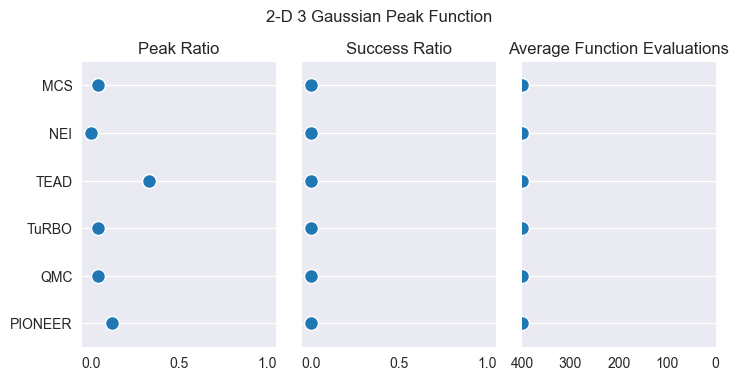

In [21]:
g5 = sns.PairGrid(case5_df,
                 x_vars=case5_df.columns[:3], y_vars=["method"],
                 height=4, aspect=0.6)
g5.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")
# Use the same x axis limits on all columns and add better labels

titles = ['Peak Ratio', 'Success Ratio', 'Average Function Evaluations']
g5.set(xlabel='', ylabel="")
for ax, title in zip(g5.axes.flat, titles):
    # Set a different title for each axes
    ax.set(title=title)
    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)
sns.despine(left=True, bottom=True)
g5.axes.flat[0].set_xlim([-0.05, 1.05])
g5.axes.flat[1].set_xlim([-0.05, 1.05])
g5.axes.flat[2].set_xlim([0, 400])
g5.axes.flat[2].invert_xaxis()
g5.figure.suptitle('2-D 3 Gaussian Peak Function')
g5.figure.subplots_adjust(top=0.85)
plt.savefig(datasavedir + '/'+'2d_mme'+'.png', bbox_inches = 'tight')